In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
xy = np.random.uniform(-1, 1, (2,50))

In [4]:
z = xy[0]**2 + xy[1]**2

In [5]:
cl1 = np.r_[xy, z.reshape(1, -1)].T

In [6]:
cl2 = np.r_[xy, -2 -1*z.reshape(1, -1)].T

In [7]:
%matplotlib widget

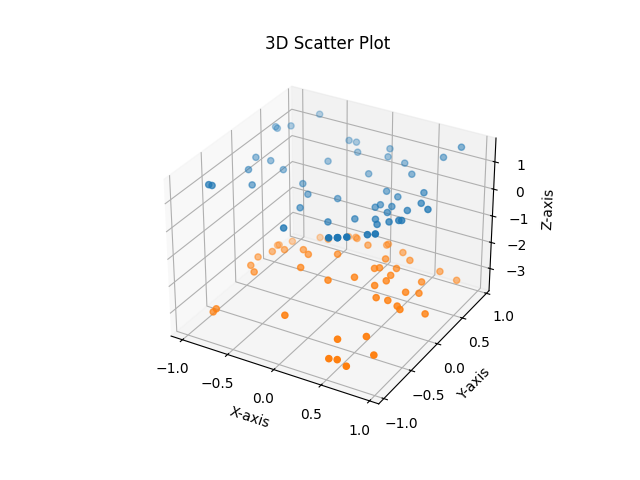

AttributeError: 'Polygon' object has no attribute 'do_3d_projection'

In [8]:

from mpl_toolkits.mplot3d import Axes3D

# # Sample data
# x = [1, 2, 3, 4, 5]
# y = [5, 4, 3, 2, 1]
# z = [2, 3, 4, 5, 6]

# Create a figure and a 3D Axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create 3D scatter plot
ax.scatter(xy[0], xy[1], z.reshape(1, -1))
ax.scatter(xy[0], xy[1], -2 -1*z.reshape(1, -1))

# Add labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Scatter Plot')

# Display the plot
plt.show()


In [9]:
np.r_[cl1, cl2].shape

(100, 3)

In [10]:
inp = np.r_[cl1, cl2]
inp.shape

(100, 3)

In [11]:
def get_exp(xi, xj, sigma=1):
    return np.exp( (-1/(2*sigma**2)) * np.sum((xi - xj)**2) )

In [12]:
pij = np.zeros((len(inp), len(inp)))

In [13]:
get_exp(inp[0], inp[1])

np.float64(0.08971442904352242)

In [14]:
for i in range(len(inp)):
    for j in range(len(inp)):
        if i == j:
            continue
        pij[i][j] = get_exp(inp[i], inp[j], sigma=0.5)

In [15]:
sum_pij = np.sum(pij)
sum_pij

np.float64(931.8374178721776)

In [16]:
for i in range(len(inp)):
    for j in range(len(inp)):
        pij[i][j] /= sum_pij

In [17]:
def get_pij(i, j):
    return (pij[i][j] + pij[j][i])/(2*len(inp))

In [18]:
pij[1][10], get_pij(1, 10)

(np.float64(0.00043514382521913), np.float64(4.3514382521913e-06))

In [19]:
y = np.random.multivariate_normal([0,0], cov=[[0.0001,0], [0,0.0001]], size=(50,))
y.shape

(50, 2)

In [20]:
qij = np.zeros((len(inp), len(inp)))
qij.shape

(100, 100)

In [21]:
def get_y(yi, yj):
    # return np.exp( -1 * np.sum((yi - yj)**2) )
    return (1 + np.sum((yi - yj)**2))**(-1)

In [22]:

for i in range(len(y)):
    for j in range(len(y)):
        if i == j:
            continue
        qij[i][j] = get_y(y[i], y[j])

In [23]:
sum_qij = np.sum(qij)
sum_qij

np.float64(2448.922106792148)

In [24]:
for i in range(len(inp)):
    for j in range(len(inp)):
        qij[i][j] /= sum_qij

In [25]:
def get_qij_affinity_mat(y):
    qij = np.zeros((len(y), len(y)))
    def get_y(yi, yj):
        # return np.exp( -1 * np.sum((yi - yj)**2) )
        return (1 + np.sum((yi - yj)**2))**(-1)

    for i in range(len(y)):
        for j in range(len(y)):
            if i == j:
                continue
            qij[i][j] = get_y(y[i], y[j])
    sum_qij = np.sum(qij)
    # sum_qij
    for i in range(len(y)):
        for j in range(len(y)):
            qij[i][j] /= sum_qij
        
    return qij

In [29]:
def gradient_step(y_now, y_prev, alpha, lr, step=0):
    
    # eq4 compute low-d affinities qij
    qij = get_qij_affinity_mat(y_now)

    # eq5 compute gradients
    grad_y = np.zeros(shape=(y_now.shape))
    y_new = np.zeros(shape=(y_now.shape))
    for i in range(len(y_now)):
        def get_grad_step(j):
            term1 = get_pij(i,j) - qij[i][j]
            term2 = y_now[i] - y_now[j]
            term3 = (1 + np.sum((y_now[i] - y_now[j])**2))**(-1)
            return term1*term2*term3
        grad_step_sum = np.sum([get_grad_step(j) for j in range(len(y_now))])
        dC_dyi = 4*grad_step_sum

        prev_diff = y_now[i] - y_prev[i]
        y_new[i] = y_now[i] + lr*dC_dyi + alpha*prev_diff
        # y_prev[i] = y_now[i]
    print(f'Step :- {step}')
    print(np.sum((y_new - y_now)**2))
    return y_new, y_now

In [30]:
timesteps = 200

In [31]:
lr = 10
alpha = 0.5

In [32]:
y = np.random.multivariate_normal([0,0], cov=[[0.0001,0], [0,0.0001]], size=(50,))
y_now = y
y_prev = np.zeros(shape=(y_now.shape))
for i in range(timesteps):
    y_now, y_prev = gradient_step(y_now, y_prev, alpha, lr, step=i)

Step :- 0
0.007306246148347159
Step :- 1
0.0009611792824904913
Step :- 2
0.001810793195462824
Step :- 3
7.476419949634957e-05
Step :- 4
0.00047438502548355084
Step :- 5
2.38681649630173e-06
Step :- 6
0.00012014701558376606
Step :- 7
8.735468755232685e-07
Step :- 8
2.8809250047900305e-05
Step :- 9
1.215756190706728e-06
Step :- 10
6.491740220732009e-06
Step :- 11
7.453834963640245e-07
Step :- 12
1.3636950274296837e-06
Step :- 13
3.306979980137361e-07
Step :- 14
2.634532601141719e-07
Step :- 15
1.2283778424851673e-07
Step :- 16
4.567240640750373e-08
Step :- 17
4.05494247149443e-08
Step :- 18
6.775152376977983e-09
Step :- 19
1.2249607188361135e-08
Step :- 20
7.7426729529182e-10
Step :- 21
3.4399548378836182e-09
Step :- 22
5.157030044836913e-11
Step :- 23
9.054780605996903e-10
Step :- 24
3.5691845466136964e-12
Step :- 25
2.2419300598155058e-10
Step :- 26
5.358690744398998e-12
Step :- 27
5.2198076487476255e-11
Step :- 28
4.012556633584917e-12
Step :- 29
1.1380887285784808e-11
Step :- 30
1.97

KeyboardInterrupt: 

In [33]:
y_now

array([[-3.28660115e-03, -2.46300363e-03],
       [-1.35826106e-02,  7.83300582e-03],
       [ 1.30858118e-03, -7.05818597e-03],
       [-5.27276454e-03, -4.76840241e-04],
       [-9.38376170e-04, -4.81122861e-03],
       [ 2.36535840e-02, -2.94031888e-02],
       [-1.25645756e-02,  6.81497079e-03],
       [ 1.86810979e-02, -2.44307027e-02],
       [-2.42473077e-02,  1.84977030e-02],
       [-1.81565280e-02,  1.24069232e-02],
       [-6.03013376e-03,  2.80528974e-04],
       [-8.80234863e-03,  3.05274384e-03],
       [ 8.49756814e-04, -6.59936160e-03],
       [-1.63200297e-02,  1.05704249e-02],
       [-1.77580334e-02,  1.20084286e-02],
       [-1.15321839e-02,  5.78257916e-03],
       [-2.20679517e-02,  1.63183469e-02],
       [-2.19216601e-03, -3.55743877e-03],
       [ 4.38769600e-03, -1.01373008e-02],
       [-5.75845476e-03,  8.84997375e-06],
       [-1.07781536e-03, -4.67178943e-03],
       [ 8.24936691e-03, -1.39989717e-02],
       [-8.91937628e-03,  3.16977150e-03],
       [-6.

In [34]:
y_now.shape

(50, 2)

In [35]:
y_now.T.shape

(2, 50)

In [6]:
plt.scatter(y_now.T[0], y_now.T[1])

NameError: name 'y_now' is not defined

In [135]:
import pylab

In [37]:
pylab.scatter(y_now[:, 0], y_now[:, 1], 20)

NameError: name 'pylab' is not defined

In [38]:
inp.shape

(100, 3)

In [39]:
def pca(X=np.array([]), no_dims=50):
    """
        Runs PCA on the NxD array X in order to reduce its dimensionality to
        no_dims dimensions.
    """

    print("Preprocessing the data using PCA...")
    (n, d) = X.shape
    X = X - np.tile(np.mean(X, 0), (n, 1))
    (l, M) = np.linalg.eig(np.dot(X.T, X))
    Y = np.dot(X, M[:, 0:no_dims])
    return Y

In [40]:
y = pca(inp, no_dims=2)

Preprocessing the data using PCA...


In [41]:
y.shape

(100, 2)

In [42]:
plt.scatter(y.T[0], y.T[1])

ValueError: s must be a scalar, or float array-like with the same size as x and y

In [43]:
v = np.arange(1,11)
v

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [44]:
np.tile(v, (10,1))

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

In [45]:
np.square(np.tile(v, (10,1)) - np.tile(v, (10,1)).T)

array([[ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81],
       [ 1,  0,  1,  4,  9, 16, 25, 36, 49, 64],
       [ 4,  1,  0,  1,  4,  9, 16, 25, 36, 49],
       [ 9,  4,  1,  0,  1,  4,  9, 16, 25, 36],
       [16,  9,  4,  1,  0,  1,  4,  9, 16, 25],
       [25, 16,  9,  4,  1,  0,  1,  4,  9, 16],
       [36, 25, 16,  9,  4,  1,  0,  1,  4,  9],
       [49, 36, 25, 16,  9,  4,  1,  0,  1,  4],
       [64, 49, 36, 25, 16,  9,  4,  1,  0,  1],
       [81, 64, 49, 36, 25, 16,  9,  4,  1,  0]])

In [8]:
ll = np.random.multivariate_normal(mean=[1,1], cov=[[8,0],[0,8]],size=(15,))
ll2 = np.random.multivariate_normal(mean=[10,10], cov=[[1,0],[0,1]],size=(15,))
ll.shape, ll2.shape

((15, 2), (15, 2))

In [9]:
X = np.r_[ll, ll2]
X.shape

(30, 2)

In [10]:
def Hbeta(D=np.array([]), beta=1.0):
    """
        Compute the perplexity and the P-row for a specific value of the
        precision of a Gaussian distribution.
    """

    # Compute P-row and corresponding perplexity
    P = np.exp(-D.copy() * beta)
    sumP = sum(P)
    # H = np.log(sumP) + beta * np.sum(D * P) / sumP
    P = P / sumP
    H = (-1*np.sum(P * np.log(P))).reshape(1, -1)
    return H, P

In [20]:
(n, d) = X.shape
sum_X = np.sum(np.square(X), 1)
D = np.add(np.add(-2 * np.dot(X, X.T), sum_X).T, sum_X)
P = np.zeros((n, n))
beta = np.ones((n, 1))
perplexity = 5
logU = np.log(perplexity)

In [21]:
tol = 1e-5
for i in range(n):
    # print(H)
    betamin = -np.inf
    betamax = np.inf
    Di = D[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))]
    (H, thisP) = Hbeta(Di, beta[i])

    # Evaluate whether the perplexity is within tolerance
    Hdiff = H - logU
    tries = 0
    while np.abs(Hdiff) > tol and tries < 50:

        # If not, increase or decrease precision
        if Hdiff > 0:
            betamin = beta[i].copy()
            if betamax == np.inf or betamax == -np.inf:
                beta[i] = beta[i] * 2.
            else:
                beta[i] = (beta[i] + betamax) / 2.
        else:
            betamax = beta[i].copy()
            if betamin == np.inf or betamin == -np.inf:
                beta[i] = beta[i] / 2.
            else:
                beta[i] = (beta[i] + betamin) / 2.

        # Recompute the values
        (H, thisP) = Hbeta(Di, beta[i])
        Hdiff = H - logU
        tries += 1

    # Set the final row of P
    P[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))] = thisP

/tmp/ipykernel_2569379/2219061342.py:12: RuntimeWarning: divide by zero encountered in log
  H = (-1*np.sum(P * np.log(P))).reshape(1, -1)
/tmp/ipykernel_2569379/2219061342.py:12: RuntimeWarning: invalid value encountered in multiply
  H = (-1*np.sum(P * np.log(P))).reshape(1, -1)


In [22]:
beta

array([[0.30566406],
       [0.33539581],
       [0.31220245],
       [0.09196281],
       [0.08685303],
       [0.40188599],
       [0.11374664],
       [0.27858353],
       [0.22147369],
       [0.43200684],
       [0.50704956],
       [0.1852951 ],
       [0.39724731],
       [0.11229515],
       [0.32212067],
       [4.        ],
       [1.26895142],
       [2.        ],
       [2.        ],
       [1.22247314],
       [2.        ],
       [2.        ],
       [0.59277344],
       [2.        ],
       [2.        ],
       [0.85220337],
       [4.        ],
       [2.        ],
       [2.        ],
       [2.        ]])

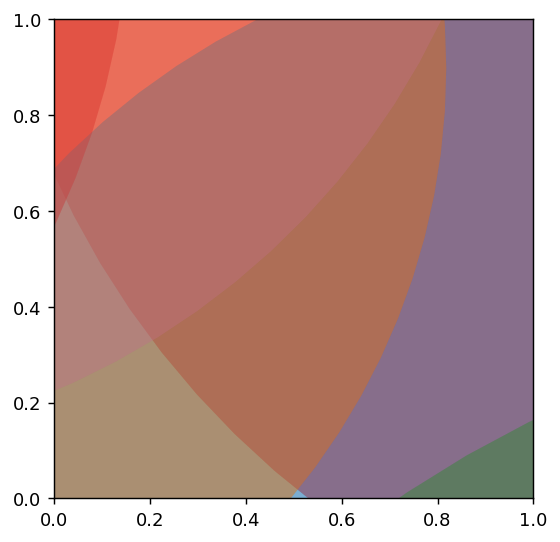

In [24]:
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.show()

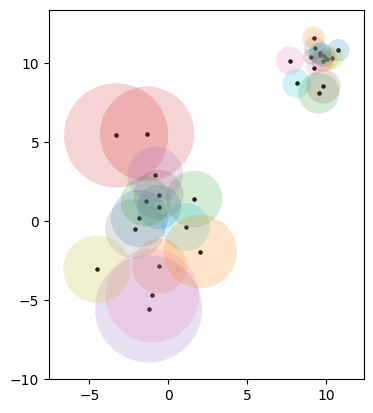

In [25]:
plt.scatter(X[:, 0], X[:, 1], s=5, c='black')
# point_idx = 56
theta = np.linspace(0, 2 * np.pi, 100)
for point_idx in range(len(X)):
    # plt.scatter(X[point_idx, 0], X[point_idx, 1], c='red')
    std_dev = 1/np.sqrt(beta[point_idx])
    std_dev = std_dev[0]
    # x_fill = [X[point_idx, 0]-std_dev, X[point_idx, 0]+std_dev]
    # y1_fill = [X[point_idx, 1]-std_dev, X[point_idx, 1]-std_dev]
    # y2_fill = [X[point_idx, 1]+std_dev, X[point_idx, 1]+std_dev]
    # plt.fill_between( x=x_fill, y1=y1_fill, y2=y2_fill, alpha=0.3)
    # c = plt.Circle((X[point_idx,0], X[point_idx,1]), std_dev, alpha=0.2)
    # plt.gca().add_artist(c)
    # Parametric equation of a circle
    
    circle_x = X[point_idx,0] + std_dev * np.cos(theta)
    circle_y = X[point_idx,1] + std_dev * np.sin(theta)

    # # Plot and fill the circle using plt.fill()
    plt.fill(circle_x, circle_y, alpha=0.2)



# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.gca().set_aspect('equal')
plt.show()

In [8]:
pdf_gen = lambda sigma: lambda x: (1/np.sqrt(2*np.pi*sigma**2))*np.exp( (-1/(2*sigma**2))*(x**2) )
pdf = pdf_gen(1)

In [33]:
def entropy(sigma):
    pdf = pdf_gen(sigma)
    x = np.linspace(-100, 100, 10000)
    pdf_vals = pdf(x)
    log_pdf_vals = np.log(pdf_vals)
    sum = np.sum(pdf_vals*log_pdf_vals)
    by_formula = (1/2)*(np.log(2*np.pi*sigma**2) + 1)
    return sum, by_formula

In [1]:
entropy(4)

NameError: name 'entropy' is not defined

In [250]:
gaussian_entropy = lambda sigma: (1/2)*(np.log(2*np.pi*sigma**2) + 1)

In [259]:
gaussian_entropy(0.5)

np.float64(0.7257913526447274)

NameError: name 'y' is not defined

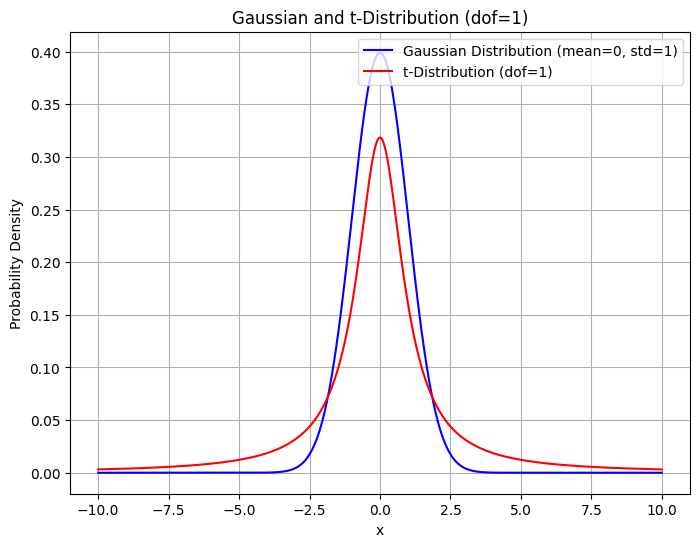

In [40]:
from scipy.stats import norm, t

# Define the range for the x-axis
x = np.linspace(-10, 10, 1000)

# Define the Gaussian (normal) distribution with mean = 0 and standard deviation = 1
mean = 0
std_dev = 1
gaussian = norm.pdf(x, mean, std_dev)

# Define the t-distribution with 1 degree of freedom (which is equivalent to Cauchy distribution)
t_dist = t.pdf(x, df=1, loc=mean)

# Plot both distributions
plt.figure(figsize=(8, 6))
plt.plot(x, gaussian, label='Gaussian Distribution (mean=0, std=1)', color='blue')
plt.plot(x, t_dist, label='t-Distribution (dof=1)', color='red')

# Add a title and labels
plt.title('Gaussian and t-Distribution (dof=1)')
plt.xlabel('x')
plt.ylabel('Probability Density')

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.grid(True)
plt.show()


In [58]:
0.4*np.log(0.4/.9)

np.float64(-0.3243720864865315)

In [49]:
np.exp()

np.float64(8.000467680231072)

In [45]:
0.4/0.05

8.0